<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/CaGraph/main/figures/icon.png" width="25%" style="padding: 20px">
</div>

# Generating and analyzing functional graphs of calcium imaging data

Developer: Veronica Porubsky <br>
Correspondence: verosky@uw.edu <br>
Example data provided by: Eric Zhang and Dr. Sean Piantadosi, Bruchas Lab, University of Washington<br>

This notebook implements a subset of the functionality provided by the Python package, cagraph. This package is designed to construct functional graphs using timeseries data of neurons recorded with calcium imaging. <br>

**Quick Links:** https://github.com/vporubsky/CaGraph


# Tutorial Outline
* [Installations and imports](#installations-imports)
* [Set path and filename](#path-filename)
* [Load and visualize raw calcium imaging data](#load-data)
* [Generate CaGraph object](#cagraph-object)
* [Analyze graph topology](#analyze-graph)
* [Visualize static graph](#visualize-static-graph)
* [Plotting matched samples](#plotting-matched-samples)



# Installations and imports  <a class="anchor" id="installations-imports"></a>

In [1]:
# !pip install -r requirements # uncomment to install package requirements
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cagraph functionality
from cagraph import CaGraph, CaGraphTimesampled
import visualization as viz
import preprocess as prep

# Additional useful imports and display setup for Jupyter notebook
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path and filename  <a class="anchor" id="path-filename"></a>

In [3]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'dg_dataset.csv'


# Load and visualize raw calcium imaging data  <a class="anchor" id="load-data"></a>

In [4]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

This dataset contains 122 neurons and 3600 timepoints.


,0,1,2,3,4,...,3595,3596,3597,3598,3599
time,0.100000,0.200000,0.30000,0.400000,0.50000,...,3.596000e+02,3.597000e+02,3.598000e+02,3.599000e+02,3.600000e+02
neuron 0,0.285750,0.262420,0.24099,0.221320,0.20325,...,6.906700e-50,6.342800e-50,5.825000e-50,5.349400e-50,4.912600e-50
neuron 1,0.446380,0.404920,0.36731,0.333190,0.30225,...,4.665400e+00,4.232100e+00,3.839000e+00,3.482400e+00,3.158900e+00
neuron 2,4.724500,4.098900,3.55620,3.085300,2.67680,...,2.710500e-22,2.351600e-22,2.040200e-22,1.770100e-22,1.535700e-22
neuron 3,0.037735,0.033251,0.02930,0.025818,0.02275,...,3.705800e-04,3.265400e-04,2.877400e-04,2.535400e-04,2.234200e-04
...,...,...,...,...,...,...,...,...,...,...,...
neuron 117,0.000000,0.000000,0.00000,0.000000,0.00000,...,1.653200e-02,1.370900e-02,1.136800e-02,9.427300e-03,7.817600e-03
neuron 118,0.000000,0.000000,0.00000,0.000000,0.00000,...,6.452500e-07,5.611700e-07,4.880400e-07,4.244400e-07,3.691300e-07
neuron 119,0.232050,0.188370,0.15292,0.124130,0.10077,...,2.642700e-06,2.145300e-06,1.741500e-06,1.413700e-06,1.147600e-06
neuron 120,0.351260,0.325990,0.30254,0.280780,0.26058,...,3.047700e-111,2.828500e-111,2.625000e-111,2.436200e-111,2.261000e-111


# Generate CaGraph object <a class="anchor" id="cagraph-object"></a>

In [5]:
# Set hyperparameters
THRESHOLD = 0.3

# Generate graph object, called "cg" from CSV file 
cg = CaGraph(DATA_PATH + FILENAME, dataset_id = '1055-1', threshold=THRESHOLD) 
cg_graph = cg.get_graph() # Construct a graph

# Dataset information using CaGraph object
print(f"The dataset contains {cg.num_neurons} neurons and has a time interval of {cg.dt} sec")
print(f"Subject is {cg.data_id}")

The dataset contains 122 neurons and has a time interval of 0.1 sec
Subject is 1055-1


# Analyze graph topology <a class="anchor" id="analyze-graph"></a>

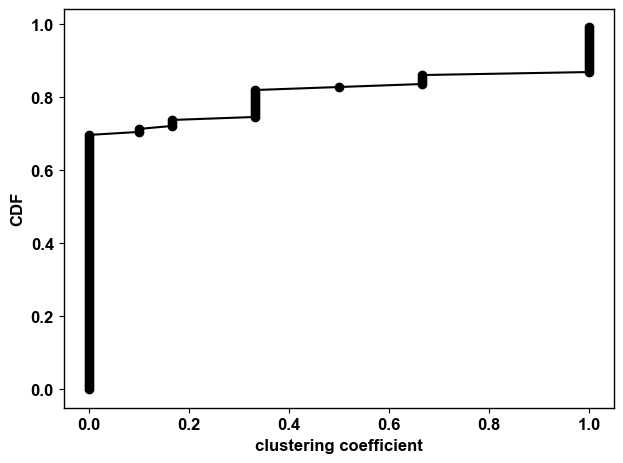

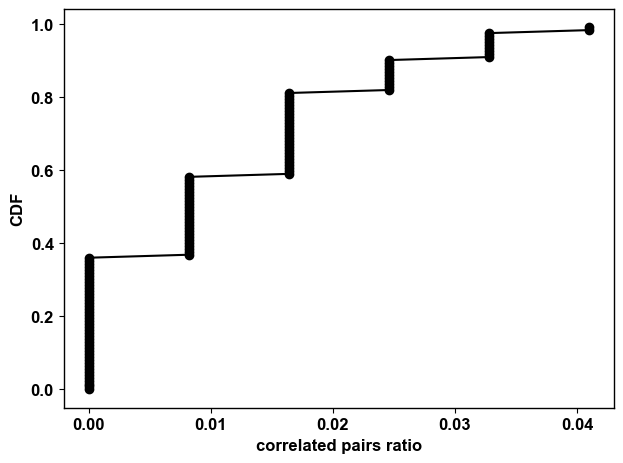

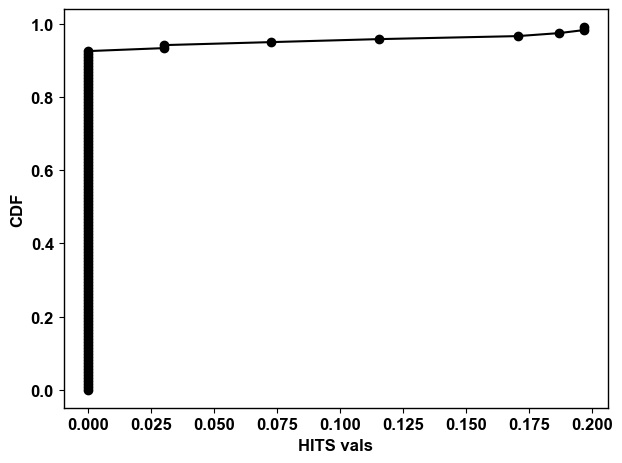

In [6]:
# Analyze graph topology
# Compute the clustering coefficient for all nodes
import matplotlib.pyplot as plt
plt.figure()
cg_cc = cg.graph_theory.get_clustering_coefficient()
viz.plot_CDF(data=cg_cc, x_label='clustering coefficient')

# Compute the correlated pairs ratio for all nodes
plt.figure()
cg_cr = cg.graph_theory.get_correlated_pair_ratio()
viz.plot_CDF(data=cg_cr, x_label='correlated pairs ratio')

# Compute the hubs in the graph
plt.figure()
cg_hits = cg.graph_theory.get_hits_values()
viz.plot_CDF(data=list(cg_hits), x_label='HITS vals')

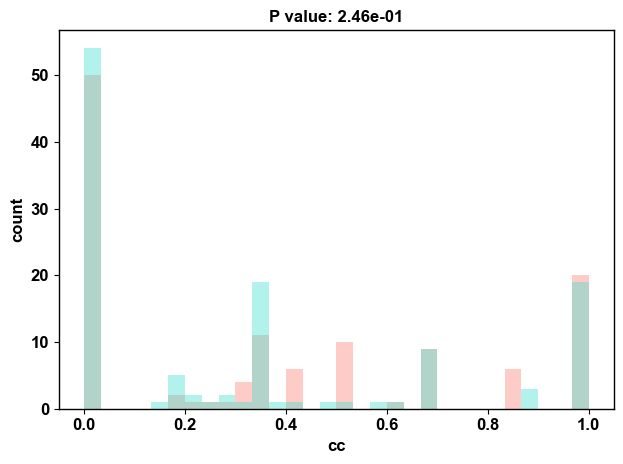

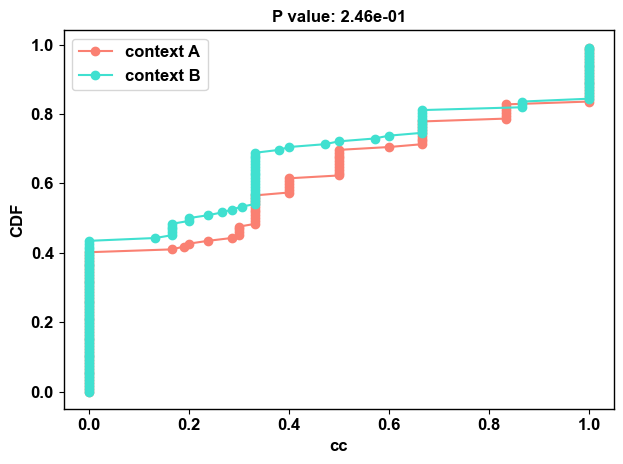

In [7]:
# Plotting CDF to compare two conditions
# Convert CSV to numpy.ndarry and index separate conditions
# Context A: second half of data
cg_A = CaGraph(np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')[:,1800:3600], threshold=THRESHOLD)
cg_A_cc = cg_A.graph_theory.get_clustering_coefficient()

# Context B: first half of data
cg_B = CaGraph(np.genfromtxt(DATA_PATH+ FILENAME, delimiter=',')[:,0:1800], threshold=THRESHOLD)
cg_B_cc = cg_B.graph_theory.get_clustering_coefficient()

# Plot histogram of distributions
viz.plot_histograms(data_list=[cg_A_cc, cg_B_cc],
                                x_label='cc',
                                colors=['salmon','turquoise'],
                                bin_size=30,
                                show_plot=True)

# Plot cumulative distribution function
viz.plot_CDFs(data_list=[cg_A_cc, cg_B_cc],
                                             x_label='cc',
                                             colors=['salmon', 'turquoise'],
                                             legend=['context A', 'context B'],
                                             show_plot=True)

# Visualize static graph <a class="anchor" id="visualize-static-graph"></a>

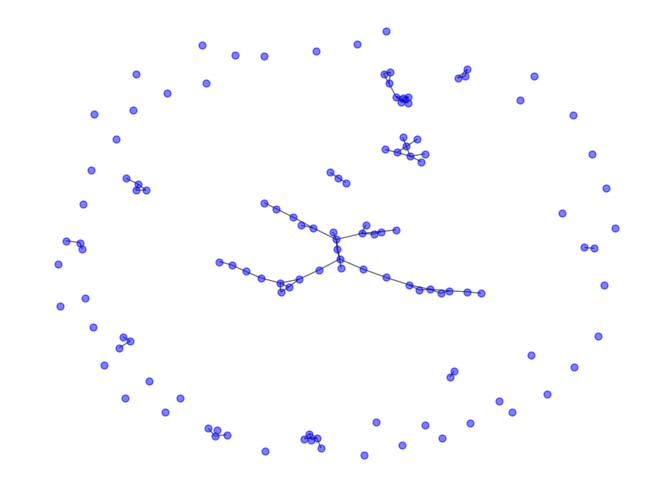

In [8]:
# Standard graph visualization with NetworkX
cg.draw_graph(graph=cg_graph) # Plot the graph (simplistic version)


# Plotting matched samples <a class="anchor" id="plotting_matched_samples"></a>

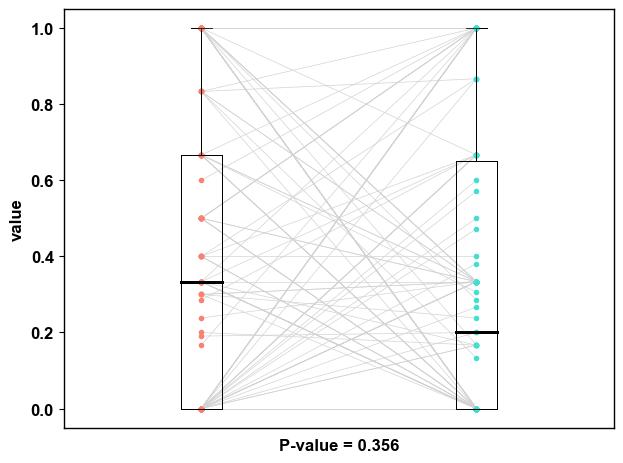

In [9]:
# Plotting matched samples
viz.plot_matched_data(sample_1=cg_A_cc,
                                  sample_2=cg_B_cc,
                                  labels=['A', 'B'],
                                  colors=['salmon','turquoise'],
                                  show_plot=True)

# Adding node metadata to CaGraph object <a class="anchor" id="node_metadata"></a>

In [10]:
import numpy as np
DATA_PATH = './datasets/'
data = np.genfromtxt(DATA_PATH + f'14-0_DG/14-0_D1_smoothed_calcium_traces.csv', delimiter=',')
context_active_metadata = np.genfromtxt(DATA_PATH + '14-0_DG/14-0_D1_neuron_context_active.csv', delimiter=',')
graph = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})

# Added attribute "context_active" contains dictionary with node metadata
print(graph.context_active)

{0: 1.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 1.0, 5: 0.0, 6: 1.0, 7: 1.0, 8: 0.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 1.0, 21: 1.0, 22: 0.0, 23: 0.0, 24: 1.0, 25: 1.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 1.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 1.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 0.0, 38: 1.0}


# Adding node metadata to interactive visualization <a class="anchor" id="node_metadata_vizualization"></a>

In [11]:
graph = CaGraph(data=data, node_metadata={'context':context_active_metadata})
palette = ('grey','blue','red')

# Visualize graph with node metadata
viz.interactive_network(cagraph_obj=graph,
                        additional_attributes={'context':context_active_metadata},
                        adjust_size_by='degree', 
                        adjust_color_by='context', 
                        palette=palette,
                        show_in_notebook=True)

Loading BokehJS ...

# Report <a class="anchor" id="report"></a>

In [12]:
graph = CaGraph(data=data)
report = graph.get_report()
display(report)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
0,1,6,0.400000,0,4.464879e-01,0.153846,1.503913e-01
1,0,2,1.000000,3,2.649169e-06,0.051282,5.499012e-18
2,0,2,1.000000,2,8.548406e-06,0.051282,2.199605e-18
3,0,0,0.000000,6,2.532581e-16,0.000000,-0.000000e+00
4,1,6,0.466667,0,4.693763e-01,0.153846,1.581009e-01
...,...,...,...,...,...,...,...
34,1,5,0.400000,0,3.810237e-01,0.128205,1.283409e-01
35,0,2,0.000000,1,2.597196e-02,0.051282,8.747587e-03
36,0,0,0.000000,17,2.532581e-16,0.000000,-0.000000e+00
37,1,5,0.500000,0,4.138706e-01,0.128205,1.394047e-01


In [13]:
report = graph.get_report(parsing_nodes=[1,3,4,5])
display(report)


,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
1,0,2,1.000000,3,2.649169e-06,0.051282,5.499012e-18
3,0,0,0.000000,6,2.532581e-16,0.000000,-0.000000e+00
4,1,6,0.466667,0,4.693763e-01,0.153846,1.581009e-01
5,0,0,0.000000,7,2.532581e-16,0.000000,-0.000000e+00


In [14]:
report = graph.get_report(parse_by_attribute='clustering coefficient', parsing_operation='>', parsing_value=0.2)
display(report)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
0,1,6,0.400000,0,0.446488,0.153846,1.503913e-01
1,0,2,1.000000,3,0.000003,0.051282,5.499012e-18
2,0,2,1.000000,2,0.000009,0.051282,2.199605e-18
4,1,6,0.466667,0,0.469376,0.153846,1.581009e-01
6,0,3,0.333333,2,0.000010,0.076923,3.299407e-18
...,...,...,...,...,...,...,...
24,0,2,1.000000,0,0.137369,0.051282,4.627013e-02
27,0,2,1.000000,0,0.200080,0.051282,6.739346e-02
32,0,2,1.000000,3,0.000003,0.051282,1.099802e-18
34,1,5,0.400000,0,0.381024,0.128205,1.283409e-01


In [15]:
graph = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})
report = graph.get_report(parse_by_attribute='context_active', parsing_operation='==', parsing_value=1)
display(report)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS,context_active
0,1,6,0.400000,0,4.457455e-01,0.153846,1.473964e-01,1.0
2,0,3,0.666667,2,1.871863e-05,0.076923,2.697635e-18,1.0
4,1,6,0.466667,0,4.686288e-01,0.153846,1.549633e-01,1.0
6,0,4,0.333333,2,2.050578e-05,0.102564,3.776689e-18,1.0
7,0,0,0.000000,6,1.061837e-25,0.000000,-0.000000e+00,1.0
...,...,...,...,...,...,...,...,...
29,0,0,0.000000,12,1.061837e-25,0.000000,-0.000000e+00,1.0
33,0,3,0.333333,1,1.037364e-02,0.076923,3.430051e-03,1.0
34,1,5,0.400000,0,3.815683e-01,0.128205,1.261747e-01,1.0
36,0,0,0.000000,15,1.061837e-25,0.000000,-0.000000e+00,1.0


# Timesampling class <a class="anchor" id="report"></a>

In [18]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'

# Timesampled class
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
ts_cagraph = CaGraphTimesampled(data=data, 
                                time_samples=[(0,6000), (6000,12000), (12000,18000)], 
                                condition_labels=['prestim', 'stim', 'poststim'], 
                                threshold=0.2)

,hubs,degree,clustering coefficient,communities,eigenvector centrality,correlated pair ratio,HITS
0,0,7,0.285714,2,1.708464e-01,0.179487,0.032909
1,0,4,0.166667,2,1.084099e-01,0.102564,0.020882
2,0,10,0.355556,2,2.412420e-01,0.256410,0.046469
3,0,9,0.388889,3,2.143688e-01,0.230769,0.041293
4,0,10,0.355556,0,2.748439e-01,0.256410,0.052940
...,...,...,...,...,...,...,...
34,0,5,0.800000,2,1.368739e-01,0.128205,0.026365
35,0,2,0.000000,1,3.214851e-02,0.051282,0.006192
36,0,5,0.800000,2,1.368739e-01,0.128205,0.026365
37,0,0,0.000000,7,9.778920e-23,0.000000,-0.000000


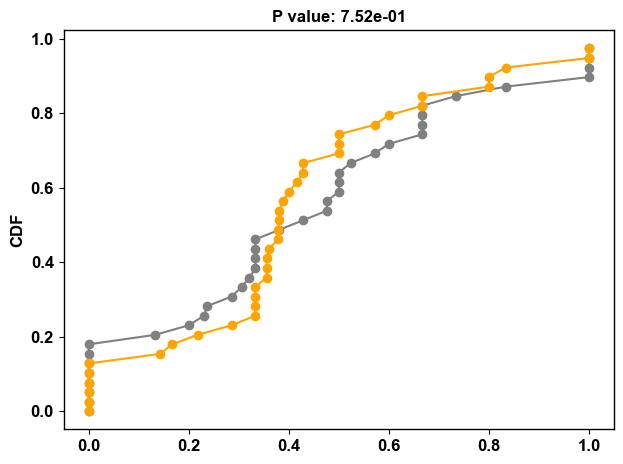

In [20]:
# Timesampled report on only one condition
display(ts_cagraph.get_cagraph('stim').get_report())

# Timesampled individual analyses
cc_prestim = ts_cagraph.get_cagraph('prestim').graph_theory.get_clustering_coefficient()
cc_stim = ts_cagraph.get_cagraph('stim').graph_theory.get_clustering_coefficient()
viz.plot_CDFs(data_list=[cc_prestim, cc_stim], colors=['grey', 'orange'])

In [28]:
#%% Timesampled visualization
pos = viz.interactive_network(ts_cagraph.get_cagraph('prestim'), return_position=True, show_in_notebook=True)

Loading BokehJS ...

In [26]:
viz.interactive_network(ts_cagraph.get_cagraph('stim'), position=pos, show_in_notebook=True)

Loading BokehJS ...

In [29]:
viz.interactive_network(ts_cagraph.get_cagraph('poststim'), position=pos, show_in_notebook=True)

Loading BokehJS ...